## Salary Prediction using Polynomial Regression

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
data = pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0, 0.5, 'Salary')

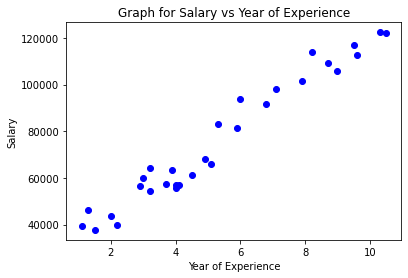

In [3]:
# Defining independent and dependent variable
X = data[["YearsExperience"]]
y = data.Salary

# Produce a scatter graph of salary against year of experience
plt.scatter(X,y,c = "blue")
plt.title("Graph for Salary vs Year of Experience")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")

In [4]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state=0)

In [5]:
X_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [6]:
X_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [7]:
# Fitting the regression model to dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly,y_train)

lin = LinearRegression()
lin.fit(X_poly, y_train)


X_poly

array([[1.00000000e+00, 9.60000000e+00, 9.21600000e+01, 8.84736000e+02,
        8.49346560e+03],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02],
       [1.00000000e+00, 5.30000000e+00, 2.80900000e+01, 1.48877000e+02,
        7.89048100e+02],
       [1.00000000e+00, 7.90000000e+00, 6.24100000e+01, 4.93039000e+02,
        3.89500810e+03],
       [1.00000000e+00, 2.90000000e+00, 8.41000000e+00, 2.43890000e+01,
        7.07281000e+01],
       [1.00000000e+00, 5.10000000e+00, 2.60100000e+01, 1.32651000e+02,
        6.76520100e+02],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02],
       [1.00000000e+00, 4.50000000e+00, 2.02500000e+01, 9.11250000e+01,
        4.10062500e+02],
       [1.00000000e+00, 8.20000000e+00, 6.72400000e+01, 5.51368000e+02,
        4.52121760e+03],
       [1.00000000e+00, 6.80000000e+00, 4.62400000e+01, 3.14432000e+02,
        2.13813760e+03],
       [1.00000000e+00, 1.3000

In [8]:
y_out = lin.predict(poly.fit_transform([[1007]]))
print(y_out)

[4.17864844e+12]


In [9]:
y_pred = lin.predict(poly.fit_transform(X_test))

print(y_pred)


[ 43186.48709405 118507.65074402  62979.04203468  60912.3212674
 115149.23696112 110084.22041947]


In [10]:
df = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
print(df)

    Actual Values  Predicted Values
2         37731.0      43186.487094
28       122391.0     118507.650744
13        57081.0      62979.042035
10        63218.0      60912.321267
26       116969.0     115149.236961
24       109431.0     110084.220419


In [11]:
# accuracy of model
print(lin.score(X_poly, y_train)*100)

95.13862964218114


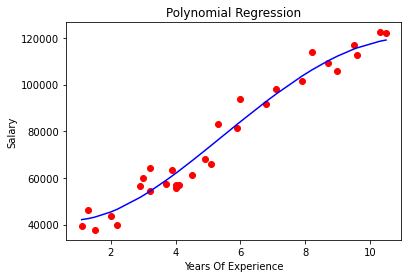

In [12]:
# plotting of polynomial regression model
plt.scatter(X, y, color="red")
plt.plot(X , lin.predict(poly.fit_transform(X)), color="blue")
plt.title("Polynomial Regression")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()